# World Instantiation and Spectator Viewpoint Study

In [ ]:
# Cell 1: Instantiate CARLA world, spawn vehicle, and study spectator viewpoints
# Purpose: Set up the simulation environment, place a vehicle at the first waypoint,
# and cycle through spectator viewpoints around the vehicle for camera placement study.

# Note game engine must be running before executing this script.
# cd /opt/carla-simulator
# ./CarlaUE4.sh

import carla
import time
import logging
import sys
import os

# For Jupyter, use os.getcwd() instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import carla_helpers as helpers

# Configure logging for debugging and LaTeX documentation
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Connect to CARLA server
try:
    client = carla.Client('localhost', 2000)
    client.set_timeout(10.0)
    world = client.get_world()
    logging.info("Connected to CARLA server")
except Exception as e:
    logging.error(f"Failed to connect to CARLA server: {e}")
    raise

# Load Town04 map
try:
    world = client.load_world('Town04')
    logging.info("Loaded Town04 map")
except Exception as e:
    logging.error(f"Failed to load Town04 map: {e}")
    raise

# Get blueprint library
bp_lib = world.get_blueprint_library()

# Select Tesla Model 3 blueprint
vehicle_bp = bp_lib.find('vehicle.tesla.model3')
if not vehicle_bp:
    logging.error("Tesla Model 3 blueprint not found")
    raise ValueError("Tesla Model 3 blueprint not found")

# Get figure-8 waypoints
try:
    waypoints = helpers.get_town04_figure8_waypoints(world, lane_id=-2) # second from left to right
    if not waypoints:
        raise ValueError("No waypoints retrieved")
    logging.info(f"Retrieved {len(waypoints)} figure-8 waypoints")
except Exception as e:
    logging.error(f"Failed to retrieve waypoints: {e}")
    raise

2025-05-12 15:34:25,519 - ERROR - Failed to connect to CARLA server: time-out of 10000ms while waiting for the simulator, make sure the simulator is ready and connected to localhost:2000


RuntimeError: time-out of 10000ms while waiting for the simulator, make sure the simulator is ready and connected to localhost:2000

: 

## Spawn vehicle

In [2]:
# Prepare spawn point (first waypoint, adjusted height)
spawn_point = waypoints[0].transform
spawn_point.location.z += 0.6  # Adjust height to avoid ground collision
logging.info(f"Vehicle spawn point: {spawn_point.location}")

# Spawn vehicle
vehicle = world.try_spawn_actor(vehicle_bp, spawn_point)
if not vehicle:
    logging.error("Failed to spawn vehicle")
    raise RuntimeError("Failed to spawn vehicle")
logging.info(f"Vehicle spawned with ID {vehicle.id} at {spawn_point.location}")

2025-04-30 09:53:20,899 - INFO - Vehicle spawn point: Location(x=160.373428, y=-371.640350, z=0.600000)
2025-04-30 09:53:20,909 - INFO - Vehicle spawned with ID 145 at Location(x=160.373428, y=-371.640350, z=0.600000)
2025-04-30 09:53:20,909 - INFO - Vehicle spawned with ID 145 at Location(x=160.373428, y=-371.640350, z=0.600000)


## Vehicle location and rotation

In [3]:
# Print vehicle location and rotation
vehicle_transform = vehicle.get_transform()
print(f"Vehicle transform: Location={vehicle_transform.location}, "
             f"Rotation={vehicle_transform.rotation}")

Vehicle transform: Location=Location(x=160.373428, y=-371.640350, z=0.001539), Rotation=Rotation(pitch=0.000000, yaw=0.501399, roll=0.000000)


## View functions

In [ ]:
def default_view(world, base_transform): # camera view
    import carla_helpers as helpers
    local_transform = base_transform
    local_transform.location.z += 0.35
    local_transform.location.z += 1.4 # need to copy as base_transform is a reference
    helpers.set_spectator_transform(world, local_transform.location, local_transform.rotation)

def side_view_left(world, base_transform):
    import carla_helpers as helpers
    x = base_transform.location.x + 0.1
    y = base_transform.location.y - 3.1
    z = base_transform.location.z
    yaw = base_transform.rotation.yaw + 90
    pitch = base_transform.rotation.pitch
    roll = base_transform.rotation.roll
    helpers.set_spectator_transform(world, (x,y,z),(pitch, yaw,roll))

def side_view_left_close(world, base_transform):
    import carla_helpers as helpers
    x = base_transform.location.x + 0.1
    y = base_transform.location.y - 1.1
    z = base_transform.location.z + 0.78
    yaw = base_transform.rotation.yaw + 90
    pitch = base_transform.rotation.pitch
    roll = base_transform.rotation.roll
    helpers.set_spectator_transform(world, (x,y,z),(pitch, yaw,roll))

def side_view_left_top(world, base_transform):
    import carla_helpers as helpers
    x = base_transform.location.x + 0.1
    y = base_transform.location.y - 3.1
    z = base_transform.location.z + 2
    yaw = base_transform.rotation.yaw + 90
    pitch = base_transform.rotation.pitch - 27
    roll = base_transform.rotation.roll
    helpers.set_spectator_transform(world, (x,y,z),(pitch, yaw,roll))

def side_view_right(world, base_transform):
    import carla_helpers as helpers
    x = base_transform.location.x + 0.1
    y = base_transform.location.y + 3.1
    z = base_transform.location.z
    yaw = base_transform.rotation.yaw - 90
    pitch = base_transform.rotation.pitch
    roll = base_transform.rotation.roll
    helpers.set_spectator_transform(world, (x,y,z),(pitch, yaw,roll))

def side_view_right_top(world, base_transform):
    import carla_helpers as helpers
    x = base_transform.location.x + 0.1
    y = base_transform.location.y + 3.1
    z = base_transform.location.z + 2
    yaw = base_transform.rotation.yaw - 90
    pitch = base_transform.rotation.pitch - 27
    roll = base_transform.rotation.roll
    helpers.set_spectator_transform(world, (x,y,z),(pitch, yaw,roll))

def side_view_left_top_front(world, base_transform):
    import carla_helpers as helpers
    x = base_transform.location.x + 1.8
    y = base_transform.location.y - 2.5
    z = base_transform.location.z + 1.5
    yaw = base_transform.rotation.yaw + 110
    pitch = base_transform.rotation.pitch - 27
    roll = base_transform.rotation.roll
    helpers.set_spectator_transform(world, (x,y,z),(pitch, yaw,roll))

def side_view_right_top_front(world, base_transform):
    import carla_helpers as helpers
    x = base_transform.location.x + 1.8
    y = base_transform.location.y + 2.5
    z = base_transform.location.z + 1.5
    yaw = base_transform.rotation.yaw - 110
    pitch = base_transform.rotation.pitch - 27
    roll = base_transform.rotation.roll
    helpers.set_spectator_transform(world, (x,y,z),(pitch, yaw,roll))

def front_view_top(world, base_transform):
    import carla_helpers as helpers
    x = base_transform.location.x + 3.5
    y = base_transform.location.y
    z = base_transform.location.z + 1.5
    yaw = base_transform.rotation.yaw - 180
    pitch = base_transform.rotation.pitch -33
    roll = base_transform.rotation.roll
    helpers.set_spectator_transform(world, (x,y,z),(pitch, yaw,roll))

# Set base transform for views of vehicle

In [5]:
base_transform = vehicle.get_transform()
base_transform.location.z += 0.6

## Default location (camera view)

In [ ]:
default_view(world, waypoints[0].transform)


=== Spectator Transform Set ===
Location: x=160.37, y=-371.64, z=1.75
Rotation: pitch=0.00, yaw=0.50, roll=0.00


## Side view left

In [17]:
side_view_left(world, base_transform)


=== Spectator Transform Set ===
Location: x=160.47, y=-374.74, z=0.60
Rotation: pitch=0.00, yaw=90.50, roll=0.00


## Side view left close

In [18]:
side_view_left_close(world, base_transform)


=== Spectator Transform Set ===
Location: x=160.47, y=-372.74, z=1.38
Rotation: pitch=0.00, yaw=90.50, roll=0.00


## Side view left top

In [19]:
side_view_left_top(world, base_transform)


=== Spectator Transform Set ===
Location: x=160.47, y=-374.74, z=2.60
Rotation: pitch=-27.00, yaw=90.50, roll=0.00


## Side view right  

In [20]:
side_view_right(world, base_transform)


=== Spectator Transform Set ===
Location: x=160.47, y=-368.54, z=0.60
Rotation: pitch=0.00, yaw=-89.50, roll=0.00


# Side view right top

In [10]:
side_view_right_top(world, base_transform)


=== Spectator Transform Set ===
Location: x=160.47, y=-368.54, z=2.60
Rotation: pitch=-27.00, yaw=-89.50, roll=0.00



## Side view left top front


In [9]:
side_view_left_top_front(world, base_transform)


=== Spectator Transform Set ===
Location: x=162.17, y=-374.14, z=2.10
Rotation: pitch=-27.00, yaw=110.50, roll=0.00


## Side view right top front

In [11]:
side_view_right_top_front(world, base_transform)


=== Spectator Transform Set ===
Location: x=162.17, y=-369.14, z=2.10
Rotation: pitch=-27.00, yaw=-109.50, roll=0.00


## Front view top

In [24]:
front_view_top(world, base_transform)


=== Spectator Transform Set ===
Location: x=163.87, y=-371.64, z=2.10
Rotation: pitch=-33.00, yaw=-179.50, roll=0.00


## Destroy vehicle (for future reference)

In [ ]:
helpers.destroy_vehicle(world, vehicle.id)

Vehicle with ID 266 has been destroyed successfully.


True

## Camera placement

In [29]:
import logging
import carla
import numpy as np
import queue
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)

def test_vehicle_and_camera(world, vehicle, camera_config):
    """
    Test vehicle and camera setup with a given configuration.

    Args:
        world: CARLA world object.
        vehicle: CARLA vehicle object.
        camera_config: Dict with camera parameters (width, height, fov, position, rotation).
    """
    settings = world.get_settings()
    settings.synchronous_mode = True
    settings.fixed_delta_seconds = 0.05
    world.apply_settings(settings)

    camera = None
    try:
        # Attach camera
        blueprint_library = world.get_blueprint_library()
        camera_bp = blueprint_library.find("sensor.camera.rgb")
        camera_bp.set_attribute("image_size_x", str(camera_config["width"]))
        camera_bp.set_attribute("image_size_y", str(camera_config["height"]))
        camera_bp.set_attribute("fov", str(camera_config["fov"]))

        camera_transform = carla.Transform(camera_config["position"], camera_config["rotation"])
        camera = world.try_spawn_actor(camera_bp, camera_transform, attach_to=vehicle)
        if not camera:
            raise RuntimeError("Failed to spawn camera")

        image_queue = queue.Queue()
        camera.listen(image_queue.put)
        logging.info(f"Camera attached at {camera_transform.location}, rotation {camera_transform.rotation}")

        # Capture image
        for _ in range(10):
            world.tick()
            if not image_queue.empty():
                image = image_queue.get()
                image_array = np.frombuffer(image.raw_data, dtype=np.uint8)
                image_array = image_array.reshape((camera_config["height"], camera_config["width"], 4))[:, :, :3]
                
                assert image_array.shape == (camera_config["height"], camera_config["width"], 3), \
                    f"Image size mismatch: expected {(camera_config['height'], camera_config['width'], 3)}"
                logging.info("Image captured and verified")

                plt.imshow(image_array)
                plt.axis("off")
                plt.show()
                return

        raise TimeoutError("No image captured after 10 frames")
    finally:
        if camera:
            camera.destroy()
            logging.info("Camera destroyed")
        settings.synchronous_mode = False
        world.apply_settings(settings)

## Default vehicle location

In [43]:
# print the carla Location and Rotation
vehicle_transform = vehicle.get_transform()
print(f"Vehicle transform: Location={vehicle_transform.location}, "
             f"Rotation={vehicle_transform.rotation}")

Vehicle transform: Location=Location(x=160.342804, y=-368.140472, z=0.001688), Rotation=Rotation(pitch=0.000000, yaw=0.501399, roll=0.000000)


## Camera at default vehicle location, no transform offsets

2025-04-30 11:31:47,770 - INFO - Camera attached at Location(x=0.000000, y=0.000000, z=0.000000), rotation Rotation(pitch=0.000000, yaw=0.000000, roll=0.000000)
2025-04-30 11:31:47,818 - INFO - Image captured and verified


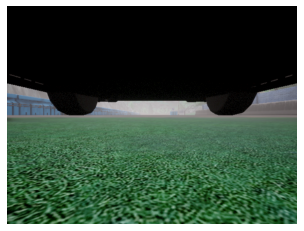

2025-04-30 11:31:47,962 - INFO - Camera destroyed


In [40]:
camera_config = {
    "width": 640,
    "height": 480,
    "fov": 90,
    "position": carla.Location(),  # Default location (0,0,0)
    "rotation": carla.Rotation()   # Default rotation (0,0,0)
}
test_vehicle_and_camera(world, vehicle, camera_config)

## Camera placement with offsets view

2025-04-30 11:36:12,805 - INFO - Camera attached at Location(x=1.400000, y=0.000000, z=1.400000), rotation Rotation(pitch=-5.000000, yaw=0.000000, roll=0.000000)
2025-04-30 11:36:12,853 - INFO - Image captured and verified


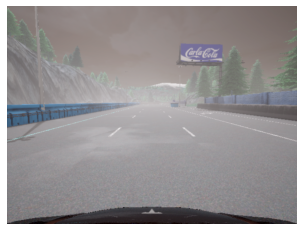

2025-04-30 11:36:13,030 - INFO - Camera destroyed


In [44]:
# Example usage
camera_config = {
    "width": 640,
    "height": 480,
    "fov": 90,
    "position": carla.Location(x=1.4, y=0.0, z=1.4),
    "rotation": carla.Rotation(pitch=-5.0, yaw=0.0, roll=0.0)
}
test_vehicle_and_camera(world, vehicle, camera_config)

## Place camera marker

In [12]:
# Cell: Define a function to place a visual marker at a camera position
# Purpose: Mark the intended camera position in the CARLA world for visualization
# and documentation in the camera placement study.

# Assumes, carla and logging have been imported from first cell

def place_camera_marker(world, position, color=carla.Color(r=255, g=0, b=0), size=0.2, life_time=20.0):
    """
    Place a visual marker at the specified camera position in the CARLA world.

    Parameters:
    - world: CARLA world object.
    - position: carla.Location object specifying the marker's position (world or relative coordinates).
    - color: carla.Color object for the marker (default: red, RGB=255,0,0).
    - size: Float specifying the marker's size in meters (default: 0.2).
    - life_time: Float specifying how long the marker persists in seconds (default: 20.0).

    Returns:
    - bool: True if the marker was placed successfully, False otherwise.
    """
    try:
        # Validate inputs
        if not isinstance(world, carla.World):
            logging.error("Invalid world object provided")
            return False
        if not isinstance(position, carla.Location):
            logging.error("Position must be a carla.Location object")
            return False
        if not isinstance(color, carla.Color):
            logging.error("Color must be a carla.Color object")
            return False

        # Draw a point marker using CARLA's debug utilities
        world.debug.draw_point(
            location=position,
            size=size,
            color=color,
            life_time=life_time
        )
        logging.info(f"Placed camera marker at {position} with color {color}, size {size}, life_time {life_time}s")
        return True

    except Exception as e:
        logging.error(f"Failed to place camera marker at {position}: {e}")
        return False


## High-Angle Three-Quarter View

In [46]:
side_view_right_top_front(world, base_transform)
try:
    # Example: Place a marker at a hypothetical camera position
    # Replace with your desired position, e.g., relative to a vehicle
    vehicle_transform = vehicle.get_transform()
    print(f"Vehicle transform: Location={vehicle_transform.location}, "
             f"Rotation={vehicle_transform.rotation}")
    #camera_position = transform.location + carla.Location(x=0.0, y=0.0, z=1.8)
    camera_position = carla.Location(x=vehicle_transform.location.x + 0.35, y=vehicle_transform.location.y, z=1.4)
    place_camera_marker(
        world=world,
        position=camera_position,
        color=carla.Color(r=255, g=0, b=0),  # Red marker
        size=0.2,  # 20 cm diameter
        life_time=30.0  # Persist for 30 seconds
    )

except Exception as e:
    logging.error(f"Failed to connect to CARLA server: {e}")

2025-04-30 11:41:17,153 - INFO - Placed camera marker at Location(x=160.723434, y=-371.640350, z=1.400000) with color Color(255,0,0,255), size 0.2, life_time 30.0s



=== Spectator Transform Set ===
Location: x=162.17, y=-369.14, z=2.10
Rotation: pitch=-27.00, yaw=-109.50, roll=0.00
Vehicle transform: Location=Location(x=160.373428, y=-371.640350, z=0.001539), Rotation=Rotation(pitch=0.000000, yaw=0.501399, roll=0.000000)


## Left side close view

In [50]:
side_view_left_close(world, base_transform)
try:
    # Example: Place a marker at a hypothetical camera position
    # Replace with your desired position, e.g., relative to a vehicle
    vehicle_transform = vehicle.get_transform()
    print(f"Vehicle transform: Location={vehicle_transform.location}, "
             f"Rotation={vehicle_transform.rotation}")
    #camera_position = transform.location + carla.Location(x=0.0, y=0.0, z=1.8)
    camera_position = carla.Location(x=vehicle_transform.location.x + 0.35, y=vehicle_transform.location.y, z=1.4)
    place_camera_marker(
        world=world,
        position=camera_position,
        color=carla.Color(r=255, g=0, b=0),  # Red marker
        size=0.2,  # 20 cm diameter
        life_time=30.0  # Persist for 30 seconds
    )

except Exception as e:
    logging.error(f"Failed to connect to CARLA server: {e}")

2025-04-30 11:44:57,017 - INFO - Placed camera marker at Location(x=160.723434, y=-371.640350, z=1.400000) with color Color(255,0,0,255), size 0.2, life_time 30.0s



=== Spectator Transform Set ===
Location: x=160.47, y=-372.74, z=1.38
Rotation: pitch=0.00, yaw=90.50, roll=0.00
Vehicle transform: Location=Location(x=160.373428, y=-371.640350, z=0.001539), Rotation=Rotation(pitch=0.000000, yaw=0.501399, roll=0.000000)
